In [36]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
df = None
for f in os.listdir('dataframes'):
    path = 'dataframes/' + f
    load_df = pd.read_csv(path, index_col=0)
    if df is None:
        df = load_df
        continue
    df = pd.concat([df, load_df])

In [3]:
df.reset_index(inplace=True)

In [4]:
df.drop('level_0', axis=1, inplace=True)

In [5]:
df.shape

(78861, 11)

In [6]:
df.to_csv('conc_data.csv')

In [26]:
df = pd.read_csv('conc_data.csv', index_col=0)

In [27]:
df.fillna(' ', inplace=True)

Пока нет по 19.3 не будем смотреть эти статьи

In [31]:
df_short = df[~df.case_common_parts_law_article.str.contains('19.3')].reset_index()

In [32]:
df_short.case_user_entry_date = pd.to_datetime(df_short.case_user_entry_date, format='%d.%m.%Y', errors='coerce' )

In [34]:
df_short['year_new'] = df_short.case_user_entry_date.dt.year

In [35]:
df_short

,level_0,case_user_doc_number,adm_case_user_name,case_common_parts_law_article,case_user_entry_date,case_doc_subject_rf,case_user_doc_court,case_user_doc_result,case_user_doc_result_date,link,year,index,year_new
0,0,5-619/2022,Сергеев Антон Викторович,ст.20.3.3 ч.1; ст.20.3.3 ч.1 КоАП РФ,2022-03-16,Республика Алтай,Майминский районный суд,Вынесено постановление о назначении администра...,,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
1,1,5-435/2022,Маланчук Леся Юрьевна,ст.20.3.3 ч.1; ст.20.3.3 ч.1 КоАП РФ,2022-05-12,Республика Крым,Феодосийский городской суд,Вынесено постановление о назначении администра...,16.05.2022,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
2,2,7п-617/2022,Зыков Георгий Александрович,ст.20.3.3 КоАП РФ,2022-06-24,Красноярский край,Красноярский краевой суд,,,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
3,3,7п-628/2022,Таркова Ксения Олеговна,ст.20.3.3 КоАП РФ,2022-07-04,Красноярский край,Красноярский краевой суд,,,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
4,4,07-344/2022,"Панкратов Михаил Сергеевич, Ступина Марина Але...","ст.20.3.3 ч.1 КоАП РФ, Не заполнено",2022-05-16,Волгоградская область,Волгоградский областной суд,Оставлено без изменения,09.06.2022,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21004,78856,1-26/2022,,,2022-06-27,Орловская область,Колпнянский районный суд,,,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
21005,78857,1-393/2022,,,2022-04-25,Воронежская область,Левобережный районный суд г. Воронежа,,,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
21006,78858,2-24/2022,,,2022-05-23,Ростовская область,Ростовский областной суд,,,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022
21007,78859,1-93/2022,,,2022-04-14,Республика Коми,Сыктывдинский районный суд,Вынесен ПРИГОВОР,,https://bsr.sudrf.ru/bigs/showDocument.html#id...,2022.0,,2022


<AxesSubplot:xlabel='year_new', ylabel='count'>

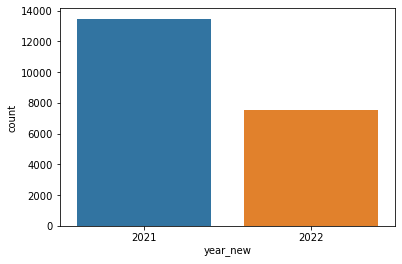

In [37]:
sns.countplot(
    data=df_short,
    x='year_new',

)